#   KEY FEATURES - QUICK ANALYSIS

Before building predictive models, we need to better understand:
* how data is distributed
* how different features relate to each other 
* which might be the most important feature for predicting a player's market value

This early analysis helps us decide which features might be most useful for modeling.

---
# 1.1| DISTRIBUTIONS OF KEY FEATURES

We started by plotting histograms of some important features such as age, rating, potential, and wage. 

This analysis provides insights into:
 - The range and spread of the data -> variability in player attributes
 - Presence of outliers -> special handling of extreme values
 - Skewness or symmetry of the data -> determining if transformations are needed

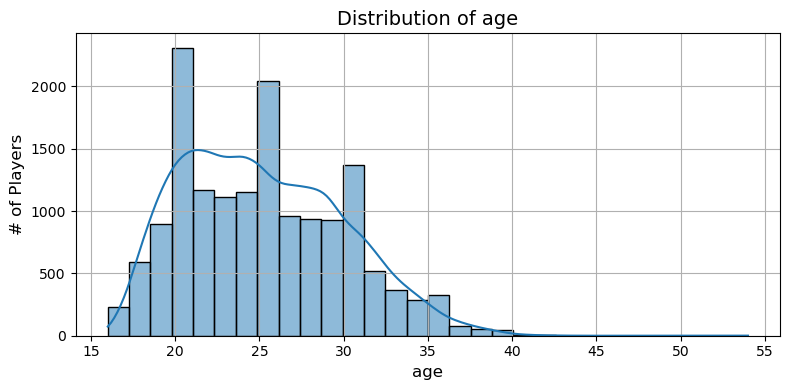

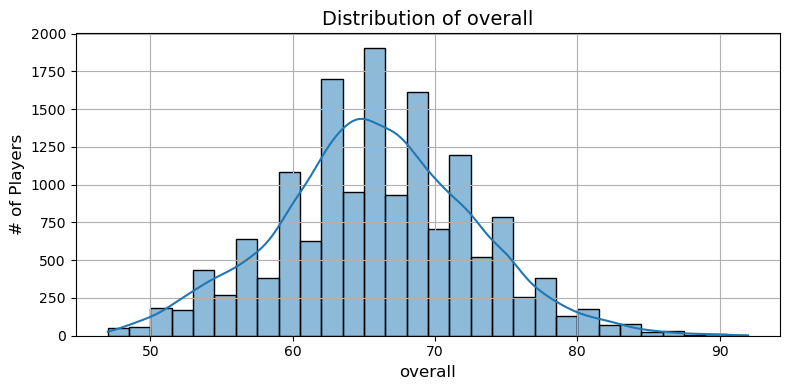

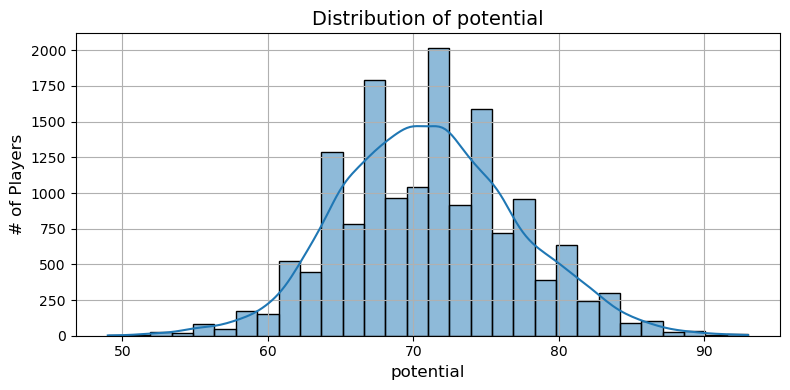

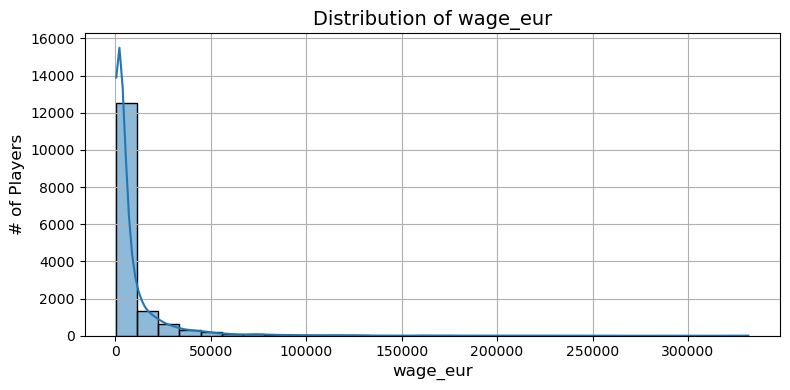

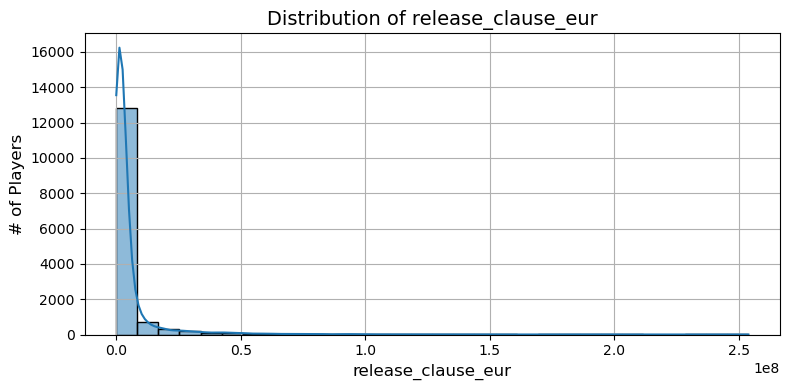

In [9]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
train = pd.read_csv('../data/train.csv')# Load the dataset

# Define the key features to visualize
# These features are chosen based on their relevance to player performance and market value
features = ['age', 'overall', 'potential', 'wage_eur', 'release_clause_eur']

# Plot histograms for each feature
for f in features:
    plt.figure(figsize=(8, 4)) 
    sns.histplot(data=train, x=f, kde=True, bins=30)  # Plot histogram with KDE (smooth curve)
    plt.title(f'Distribution of {f}', fontsize=14) 
    plt.xlabel(f, fontsize=12)  
    plt.ylabel('# of Players', fontsize=12)  
    plt.grid(True)  
    plt.tight_layout()  
    plt.show() 

### Distribution Summary Table

| Feature        | Main Range         | Peak (Most Frequent) | Shape        | Outliers / Comments                                 |
|-----------------|---------------------|----------------------|--------------|-----------------------------------------------------|
| Age             | 18–25 years         | 20–21 years           | Right-skewed | Few players >35 years old, rare extreme values to 50 |
| Overall         | 60–80 ratings       | 62–75 ratings         | Symmetrical  | Few very high-rated players (>85)                   |
| Potential       | 65–85 ratings       | 72–74 ratings         | Symmetrical  | Some players have potential >90, rare           |
| Wage (wage_eur) | 0–100K euros/week   | 0–20K euros/week      | Highly right-skewed | Few players earning >100K euros/week              |
| Release Clause (release_clause_eur) | 0–50M euros        | 0–10M euros          | Highly right-skewed | Very few players with very high release clauses (>50M) |


---
# 1.2| BOXPLOT ANALYSIS

After analyzing the general distribution of the main features using histograms, we now employ boxplots to :
* Gain deeper insights into the data spread;
* Identify potential outliers; 
* Observe the central tendency of each feature.



In [ ]:
# Key features
features = ['age', 'overall', 'potential', 'wage_eur', 'release_clause_eur']
train[features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,15391.0,2.521090e+01,4.753887e+00,16.000000,21.000000,2.500000e+01,2.900000e+01,5.400000e+01
overall,15391.0,6.576987e+01,6.890025e+00,47.000000,61.000000,6.600000e+01,7.000000e+01,9.200000e+01
potential,15391.0,7.108622e+01,6.112911e+00,49.000000,67.000000,7.100000e+01,7.500000e+01,9.300000e+01
wage_eur,15342.0,8.610310e+03,1.855964e+04,456.558174,947.936111,2.841617e+03,7.683740e+03,3.316805e+05
release_clause_eur,14457.0,5.367525e+06,1.478709e+07,16000.000000,798000.000000,1.600000e+06,3.600000e+06,2.539000e+08


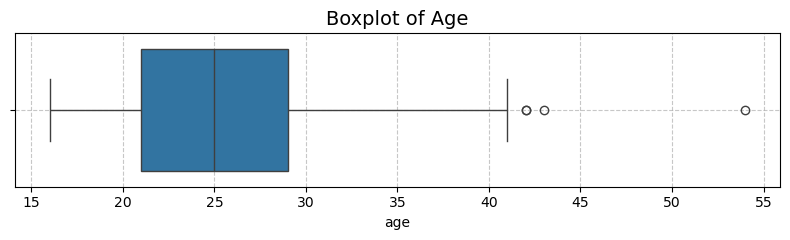

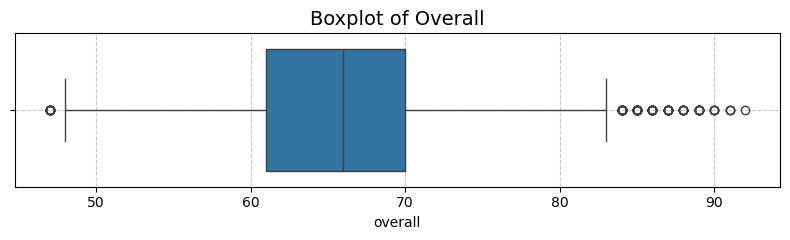

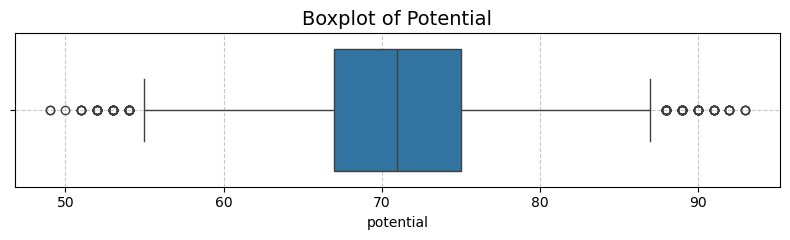

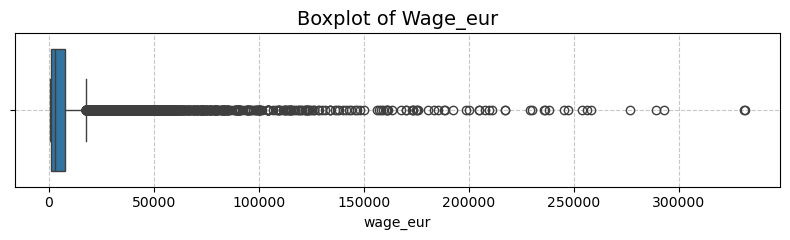

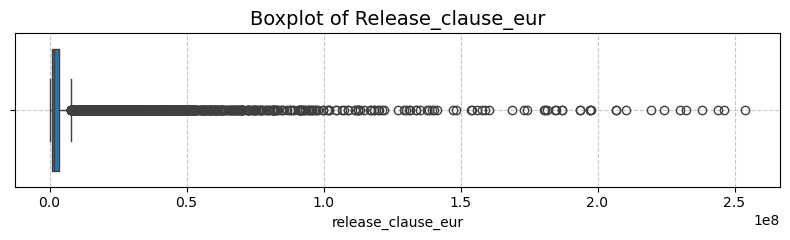

In [ ]:
# Plot boxplots
for f in features:
    plt.figure(figsize=(8, 2.5))
    sns.boxplot(data=train, x=f)
    plt.title(f'Boxplot of {f.capitalize()}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### Boxplot Summary Table

| Feature              | Median (approx.) | Spread (IQR)             | Outliers Observed?         | Comments |
|----------------------|------------------|---------------------------|-----------------------------|----------|
| Age                  | ~22 years         | 20–25 years               | Few players >35 years        | Young dataset, rare very old players |
| Overall              | ~70 rating        | 65–75 ratings             | Few outliers >85             | Most players are in mid ratings |
| Potential            | ~75 rating        | 70–80 ratings             | Some outliers >90            | Some very high potential players exist |
| Wage (wage_eur)      | ~10K €/week        | 0–20K €/week              | Strong outliers >100K €/week | Few superstars earn massive wages |
| Release Clause (release_clause_eur) | ~5M €            | 0–10M €                  | Some extreme values >50M €   | Few players have huge release clauses |